# Sentiment Analysis Strategy
This strategy is using a csv file containing Google News articles and their corresponding sentiment between August and September 2022. This sentiment was obtained using Azure in Excel. Based on the sentiment, a buy or sell signal is created for each day in the range, and our strategy compares its returns versus simply holding SPY.

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading and Downloading Data
We obtain the data for one month in 2022 for SPY, load the data from our sentiment csv, calculate our average sentiment score, and calculate our benchmark's returns.

In [12]:
benchmark = yf.download('SPY', start = '2022-8-18', end = '2022-9-17', auto_adjust = True)
benchmark.drop(columns = ['Open', 'High', 'Low', 'Volume'], inplace = True)
benchmark['return'] = benchmark['Close'].pct_change()

sentiment = pd.read_csv('Sentiment Combined Data.csv')
sentiment_average = sentiment['Sentiment'].mean()

[*********************100%%**********************]  1 of 1 completed


In [13]:
sentiment.head()

,Date,Sentiment
0,8/18/2022,0.813
1,8/19/2022,0.771
2,8/22/2022,0.794
3,8/23/2022,0.804
4,8/24/2022,0.810


Here we can see the average sentiment, and where our samples fall on either side of it.

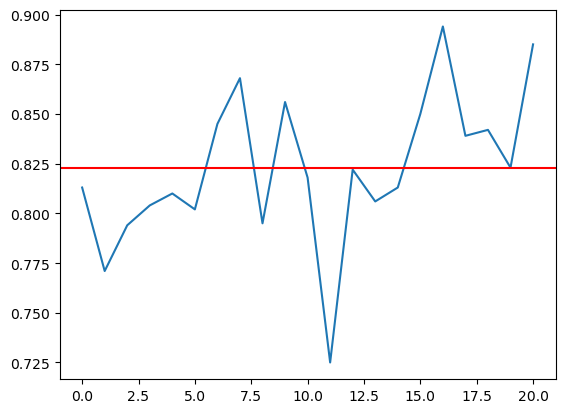

In [14]:
sentiment['Sentiment'].plot()
plt.axhline(y = sentiment_average, color = 'r')

### Creating Signals
Here, we create a buy signal (1) for any sentiment greater than the average sentiment for the period. We create a sell signal (-1) for any sentiment less than the average. We also calculate our strategy's returns by multiplying the benchmark's returns by the signal.

In [15]:
benchmark['signal'] = np.where(sentiment['Sentiment'] > sentiment_average , 1, 0)
benchmark['signal'] = np.where(sentiment['Sentiment'] < sentiment_average , -1, 0)
benchmark['strategy return'] = benchmark['signal'] * benchmark['return']

benchmark.head()

,Close,return,signal,strategy return
Date,,,,
2022-08-18,417.840973,NaN,-1,NaN
2022-08-19,412.226013,-0.013438,-1,0.013438
2022-08-22,403.642487,-0.020822,-1,0.020822
2022-08-23,402.665924,-0.002419,-1,0.002419
2022-08-24,403.954926,0.003201,-1,-0.003201


### Performance
Here, we can see the performance of our strategy versus simply buying and holding the benchmark security. We beat the benchmark by around 10 percent.

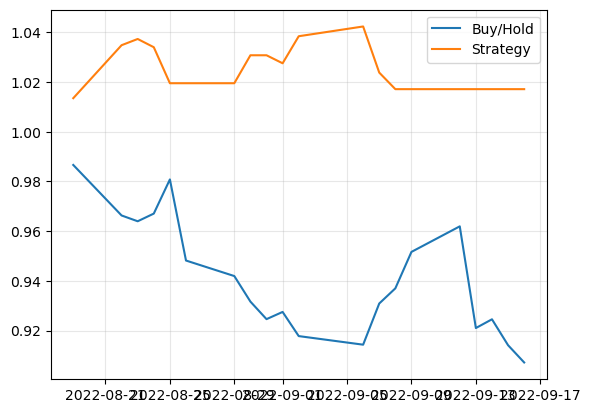

In [16]:
plt.plot(np.exp(benchmark['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(benchmark['strategy return']).cumprod(), label='Strategy')
plt.legend()
plt.grid(True, alpha = .3)

In [17]:
benchmark_return = np.exp(benchmark['return']).cumprod()[-1] -1
system_return = np.exp(benchmark['strategy return']).cumprod()[-1] -1
benchmark_sharpe = (benchmark['return'].mean()/np.std(benchmark['return'])) * np.sqrt(252)
system_sharpe = (benchmark['strategy return'].mean()/np.std(benchmark['strategy return'])) * np.sqrt(252)

print('Benchmark Sharpe Ratio: ', benchmark_sharpe.round(2),
      '\nBenchmark Return: ', benchmark_return.round(2),
      '\nSystem Sharpe Ratio: ', system_sharpe.round(2),
      '\nSystem Return: ', system_return.round(2))

Benchmark Sharpe Ratio:  -5.06 
Benchmark Return:  -0.09 
System Sharpe Ratio:  1.59 
System Return:  0.02


#### Motivation
The motivation for sentiment analysis was to see how the SPY index would move based on news articles. We uploaded a months worth of articles to see how it affected the index. We used one month worth of articles due to the massive amount of articles released daily.


#### Analysis
Neither the benchmark nor the strategy performed very well but the strategy outperformed the benchmark. The benchmark sharpe ratio and return were both negative but the strategy returned a sharpe ratio of 1.59 and a return of .02. Neither one would be something I would want to use.
The primary flaw in this strategy is because of the sample size -- finding an easily parseable list of news articles with labelled dates proved to be difficult, so we only used a sample of 900 articles over the course of a few weeks. Because of this, our original idea of using positive (>.5) or negative (<.5) sentiments to determine our signals didn't work, since every day had positive sentiment. Additionally, beating a stock's performance for a single month tells us very little about the strategy's potential. With a much larger dataset, we would be able to develop a more robust strategy.


#### References
https://en.wikipedia.org/wiki/Sentiment_analysis